# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Módulo 1 - Aula 3 - Criando um modelo inicial

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('C:\\Users\\joaoc\\OneDrive\\Documentos\\Aprendizado_ONE\\formacao-tech-foundation\\curso17_classificacao_validacao_de_modelos_metricas_de_avaliacao\\emp_automovel.csv')

Coluna inadimplente: 0 = pagou o empréstimo e 1 = não pagou o empréstimo (inadimplente).
Todos os dados são numéricos e toda a base de dados já está tratada.

In [3]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


Separar as colunas entre variáveis explicativas (x) e variável alvo (y)

In [4]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

Usar o algorítimo de árvore de decisão

In [5]:
from sklearn.tree import DecisionTreeClassifier

Vamos ajustar o algorítimo em um modelo, inicializar em uma variável "modelo", utilizando o método fit passando as variáveis explicativas e alvo que vai armazenar o padrão dos dados e vai conseguir classificar dados novos e comparar. O método score() tem a finalidade de comparar as previsões feitas pelo modelo com os valores reais dos dados e calcula uma taxa de acerto em porcentagem chamada de acurácia, que se der 1.0 = 100%.

In [6]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

Significa que o modelo não está errando em nenhum momento na classificação dos dados.

In [7]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


### Módulo 1 - Classificando dados - Aula 5 - Validando o modelo

In [8]:
from sklearn.model_selection import train_test_split

Depois de importada a função, podemos fazer a primeira separação. Vamos fazer a separação de treino e validação em um mesmo conjunto de dados, que será chamado de x. Esse conjunto substituirá o valor x existente. A outra parte será os dados de teste.

Portanto, vamos criar variáveis chamadas de x_test e y_test, que vão armazenar esses dados. Para separá-los, podemos escrever o seguinte:

x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)

Agora, podemos fazer a subdivisão dos dados de treino e validação. Vamos utilizar a mesma função train_test_split, mas desta vez iremos usar os dados armazenados em x e y. Lembrando que esses não são os mesmos dados iniciais, pois substituímos o dado x e y por essas novas variáveis, ou seja, somente essa parte de treino e validação está sendo separada aqui agora entre treino e validação.

x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

Vamos abrir essa célula e passar o parâmetro stratify igual a y e o random_state igual a 5, isso para manter a proporção dos dados e garantir que o resultado que estamos construindo aqui seja o mesmo que você obterá nas vezes em que executar esse código.

In [12]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

Vamos iniciar nosso modelo escrevendo: modelo = DecisionTreeClassifier. Em seguida, ajustaremos nosso modelo escrevendo: modelo.fit, passando como parâmetros x_treino e y_treino. Dessa maneira, o modelo será ajustado, compreendendo o padrão dos dados apenas com base na sessão de treinamento.

In [13]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier()

Agora, utilizaremos a acurácia. Faremos duas acurácias diferentes, uma para o treinamento e outra para o teste, para conseguirmos comparar como o modelo performa utilizando os mesmos dados de treinamento e como se sai para dados novos.

In [14]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8459312839059675


Vamos copiar esse código da célula anterior, colar na célula abaixo e modificar esse parâmetro da árvore de decisão para max_depth igual a 10. Assim, estabeleceremos uma profundidade máxima de 10.

In [15]:
modelo = DecisionTreeClassifier(max_depth = 10) # Definindo a profundidade máxima da árvore com max_depth
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9221927497789567
Acurácia de validação: 0.9086196503918023


### Módulo 1 - Classificando dados - Aula 7 - Avaliando o modelo

In [17]:
from sklearn.metrics import confusion_matrix

Criar a matriz de confusão.

A matriz de confusão nos informa a quantidade de acertos e erros para cada uma das categorias da variável alvo, ou seja, a quantidade de clientes que o modelo classificou como adimplentes e a quantidade de clientes que o modelo identificou como inadimplentes.

In [18]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[7514   57]
 [ 701   23]]


In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

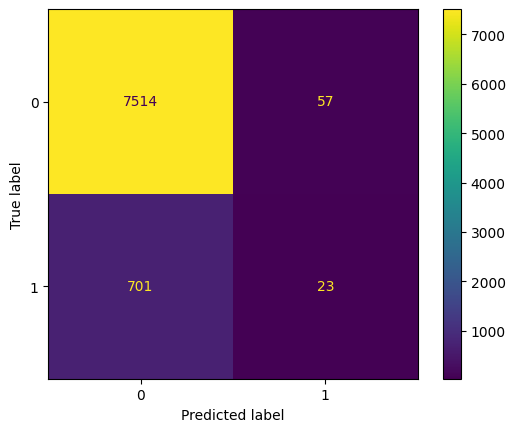

In [20]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

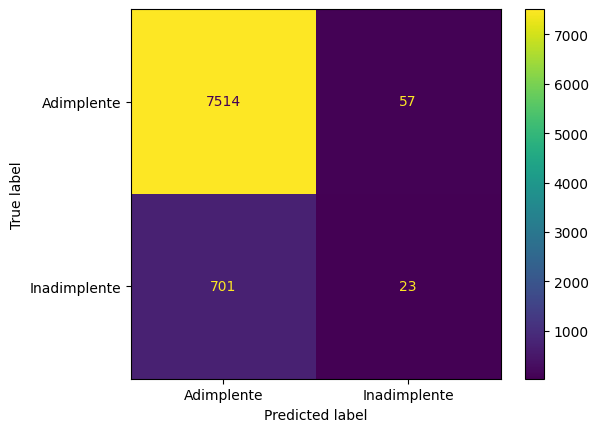

In [21]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

In [22]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


### Módulo 1 - Classificando dados - Aula 10 - Desafio: construindo um segundo modelo

É recomendado utilizar mais de um modelo de classificação em projetos de machine learning, para que sejam comparados os resultados e escolhido aquele modelo que tem um melhor desempenho, após todas as análises e aprimoramentos.

Utilizamos durante a aula o algoritmo de árvore de decisão, mas a biblioteca Scikit-Learn possui diversos outros métodos de classificação que podem ser utilizados no nosso projeto. Como desafio, utilize o algoritmo Random Forest para criar um modelo e avaliar o desempenho com a acurácia e a matriz de confusão, e compare os resultados com o resultado da árvore de decisão.

Como uma dica, vasculhe a documentação do algoritmo RandomForestClassifier. Explore este material e perceba como importar a função. Durante esse processo, lembre-se de checar os parâmetros do método para evitar que o modelo se ajuste muito aos dados de treinamento.

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Modelo Random Forest
modelo_rf = RandomForestClassifier(max_depth=10)
# Treinamento do modelo
modelo_rf.fit(x_treino, y_treino)

RandomForestClassifier(max_depth=10)

In [ ]:
# Visualização da acurácia
print(f'Acurácia de treino: {modelo_rf.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(x_val, y_val)}')

Acurácia de treino: 0.9151997427859497
Acurácia de validação: 0.9127185051235684


In [50]:
# Avaliação do modelo
y_previsto_rf = modelo_rf.predict(x_val)
# Matriz de confusão
matriz_confusao_rf = confusion_matrix(y_val, y_previsto_rf)

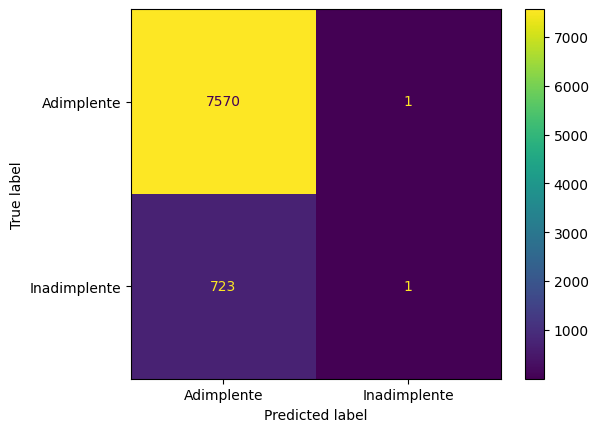

In [ ]:
# Visualização da matriz de confusão
visualizacao_rf = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_rf, display_labels=['Adimplente', 'Inadimplente'])
visualizacao_rf.plot();